In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:

data=pd.read_csv('Mall_Customers.csv')
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
x=data.iloc[:,[3,4]]

In [8]:
x.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


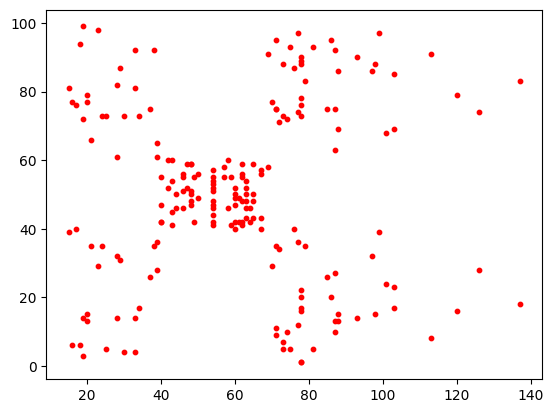

In [9]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],s=10,c='r')

In [10]:
from sklearn.cluster import KMeans

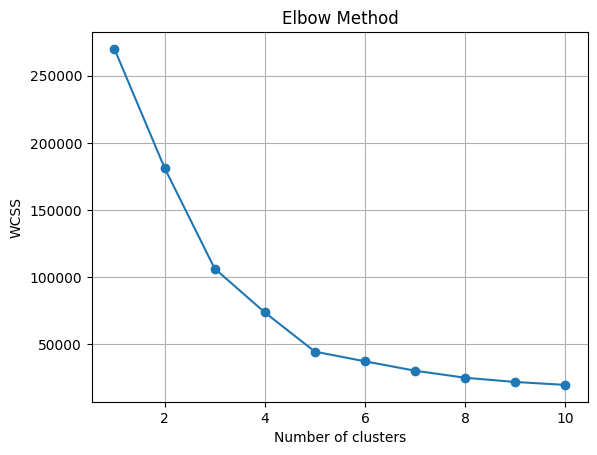

In [12]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [13]:
km=KMeans(n_clusters=5,init='k-means++',n_init=10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [14]:
cluster_label=km.predict(x)

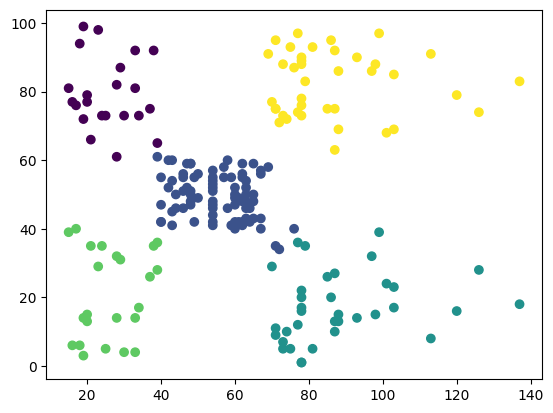

In [15]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=cluster_label)
plt.show()

In [16]:
from sklearn.cluster import DBSCAN

In [24]:
dbs=DBSCAN(eps=5,min_samples=5)


In [25]:
y_dbs=dbs.fit_predict(x)

In [26]:
np.unique(y_dbs)

array([-1,  0,  1,  2,  3,  4])

In [27]:
x_1=x.copy()

In [28]:
x_1.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


In [29]:
x_1['Clusters']=y_dbs
x_1.head(3)

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,-1
1,15,81,0
2,16,6,-1


In [30]:
x_1

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,-1
1,15,81,0
2,16,6,-1
3,16,77,0
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [31]:
x_1['Clusters'].unique()

array([-1,  0,  1,  2,  4,  3])

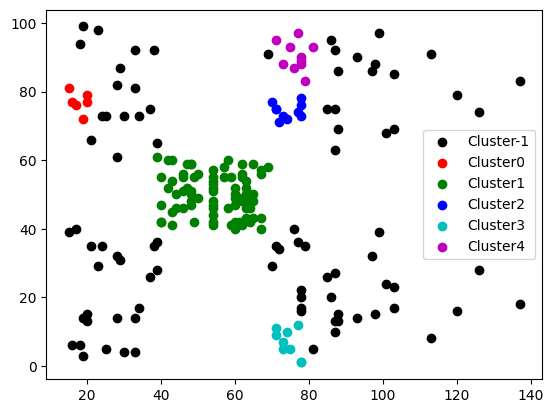

In [34]:
colors=['r','g','b','c','m','black']
for i in range(-1,5):
  cluster_data=x_1[y_dbs==i]
  plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],c=colors[i],label=f'Cluster{i}')
plt.legend()


In [ ]:
# -1 denotes noise points

# 0,1,2,3,4 denote valid points